In [1]:
import arviz as az
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy.stats

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
RANDOM_SEED = 1066
rng = np.random.default_rng(RANDOM_SEED)
mpl.rcParams['figure.constrained_layout.use'] = True

This is 2024 homework 1 from https://github.com/rmcelreath/stat_rethinking_2024/blob/main/homework/week01.pdf

## Problem 1

Construct the posterior distribution of the globe tossing problem for 3 waters and 11 lands.

In [4]:
N, W = 14, 3

In [5]:
grid = np.linspace(0, 1, 100)

In [6]:
prior = np.ones(shape=grid.shape)

In [7]:
prior = prior / prior.sum()

In [8]:
posterior = scipy.stats.binom.pmf(W, N, grid)

In [9]:
posterior = prior * posterior

In [10]:
posterior = posterior / posterior.sum()

Text(0.5, 0, 'Proportion of water')

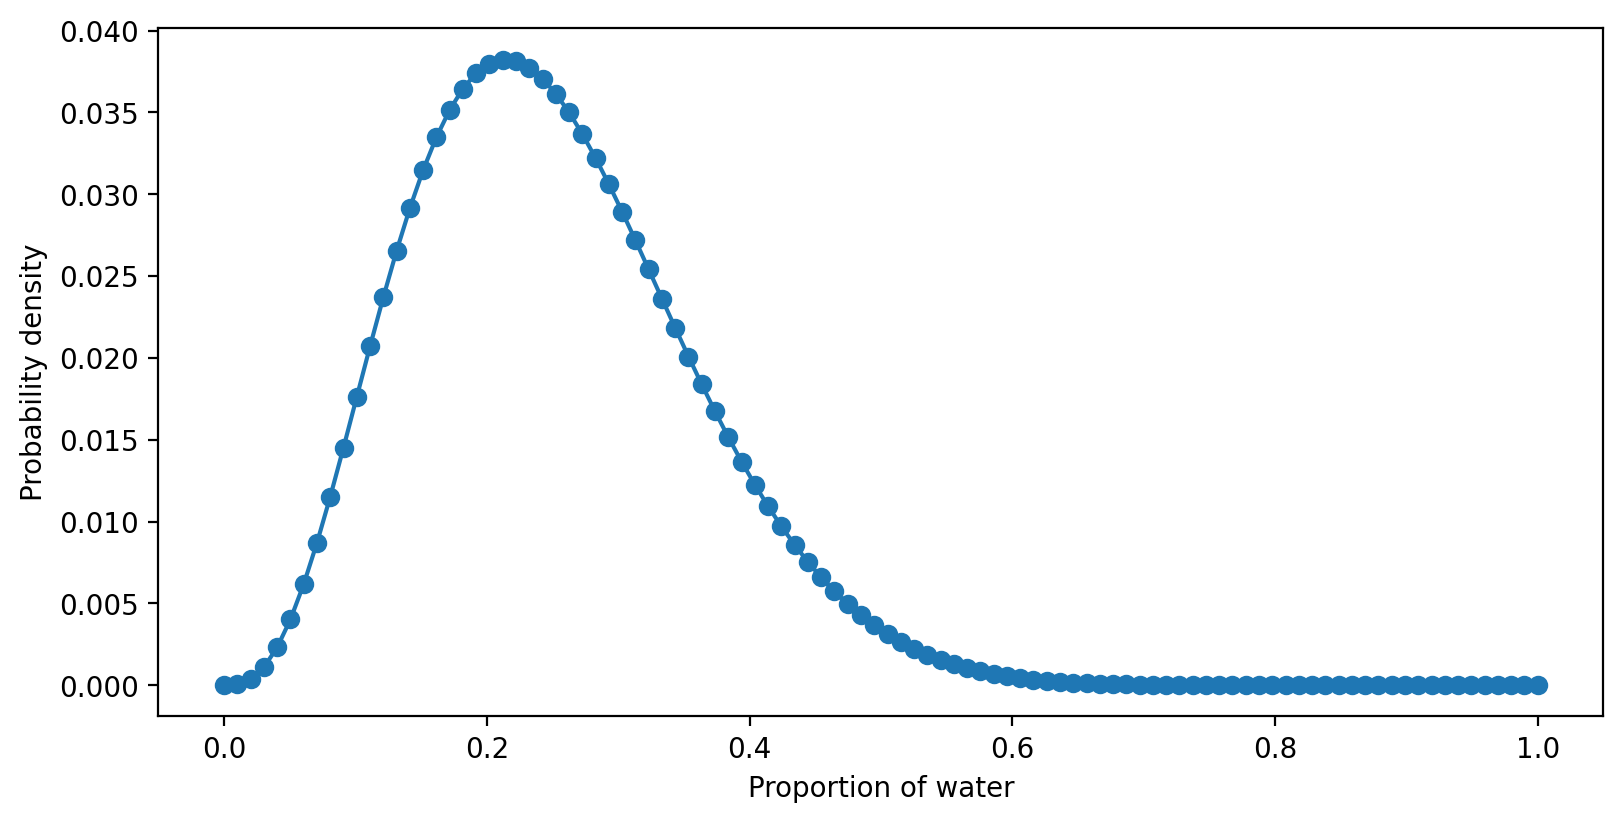

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(grid, posterior, 'o-')
ax.set_ylabel('Probability density')
ax.set_xlabel('Proportion of water')

## Problem 2

Using above posterior, compute posterior predictive distribution for the next 5 tosses.

In [12]:
samples = np.random.choice(grid, size=int(1e4), replace=True, p=posterior)

In [13]:
post_predictive = scipy.stats.binom.rvs(n=5, p=samples)

Text(0, 0.5, 'Proportion of the outcome')

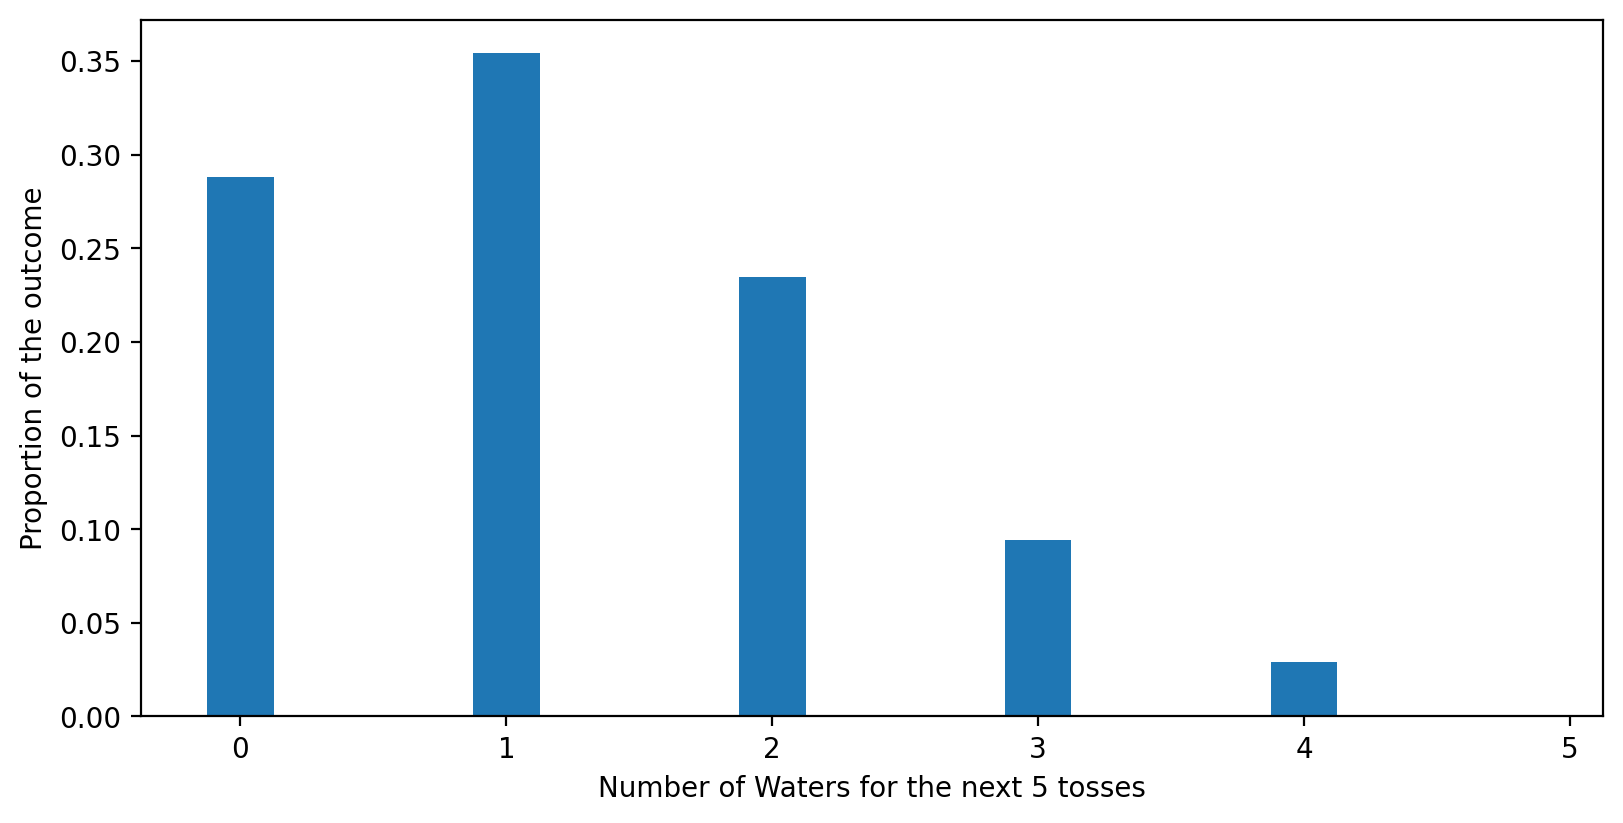

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.25
plt.hist(post_predictive, bins=np.arange(0, 6) - bar_width / 2, width=bar_width, density=True);
ax.set_xlabel('Number of Waters for the next 5 tosses')
ax.set_ylabel('Proportion of the outcome')

## Problem 3

I observe 7 waters, but didn't count lands. Assume proportion of water is 0.7.

Compute posterior distribution for the number of tosses.

In [15]:
W, p = 7, 0.7

With binomial distribution:

In [16]:
# reasonable range
n_lands = np.array(range(20))

In [17]:
lands_prob = [
    scipy.stats.binom.pmf(n=W + x, p=p, k=W)
    for x in n_lands
]

Text(0, 0.5, 'Probability of the outcome')

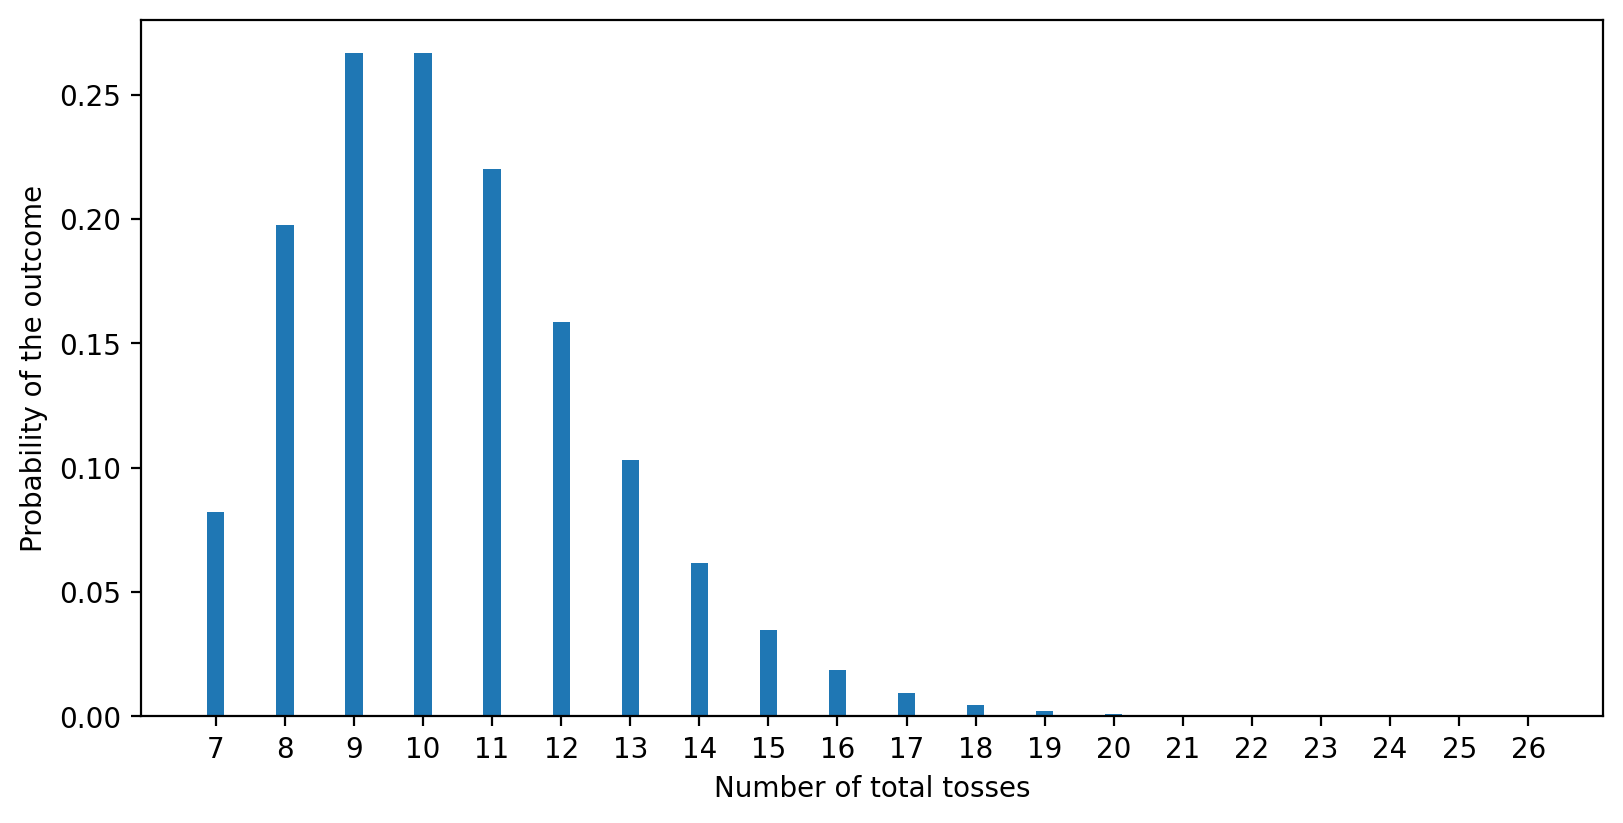

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.25
ax.bar(W + n_lands, lands_prob, width=0.25)
ax.set_xticks(W + n_lands)
ax.set_xlabel('Number of total tosses')
ax.set_ylabel('Probability of the outcome')